In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def generate_linear (n=100):
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []

  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0]-pt[1])/1.414

    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
      
  return np.array(inputs), np.array(labels).reshape(n, 1)

In [ ]:
x1_train, y1_train = generate_linear(n=100)
x1_test, y1_test = generate_linear(n=100)

In [ ]:
class NeuralNetwork():
  def __init__(self, ):
    self.inputSize = 2
    self.outputSize = 1
    self.hidden1Size = 7
    self.hidden2Size = 5

    self.W1 = np.random.rand(self.inputSize, self.hidden1Size)
    self.W2 = np.random.rand(self.hidden1Size, self.hidden2Size)
    self.W3 = np.random.rand(self.hidden2Size, self.outputSize)


  def forward(self, X):
    self.Z1 = np.matmul(X, self.W1)
    self.Z1 = self.sigmoid(self.Z1)
    self.Z2 = np.matmul(self.Z1, self.W2)
    self.Z2 = self.sigmoid(self.Z2)
    self.Y = np.matmul(self.Z2, self.W3)
    self.Y = self.sigmoid(self.Y)
    o = self.Y
    return o

  def sigmoid(self, s):
    return 1 / (1 + np.exp(-s))

  def sigmoidPrime(self, s):
    return s * (1 - s)

  def backward(self, X, Y, o):
    self.o_error = o - Y
    self.o_delta = 2 * self.o_error * self.sigmoidPrime(o)
    self.Z2_error = np.matmul(self.o_delta, np.matrix.transpose(self.W3))
    self.Z2_delta = self.Z2_error * self.sigmoidPrime(self.Z2)
    self.Z1_error = np.matmul(self.Z2_delta, np.matrix.transpose(self.W2))
    self.Z1_delta = self.Z1_error * self.sigmoidPrime(self.Z1)
    self.W3 -= learning_rate * np.matmul(np.matrix.transpose(self.Z2), self.o_delta)
    self.W2 -= learning_rate * np.matmul(np.matrix.transpose(self.Z1), self.Z2_delta)
    self.W1 -= learning_rate * np.matmul(np.matrix.transpose(X), self.Z1_delta)


## Basic Case

In [ ]:
# train

epochs = 50000
learning_rate = 0.4
NN = NeuralNetwork()

loss_list = np.zeros(epochs)
accuracy_list = np.zeros(epochs)
y_pred = np.zeros(epochs)
for epoch in range(epochs):

  # Training Loss
  o = NN.forward(x1_train)
  NN.backward(x1_train, y1_train, o)
  loss_list[epoch] = np.square(NN.o_error).mean()
  
  # Test Accuracy
  count = 0
  o_test = NN.forward(x1_test)
  for i in range(x1_test.shape[0]):
    if o_test[i] > 0.5 : 
      y_pred[i] = 1
    else:
      y_pred[i] = 0
    if y_pred[i] == y1_test[i]:
      count += 1

  accuracy_list[epoch] = count / x1_test.shape[0]

Loss: 0.000000


Text(0, 0.5, 'Loss')

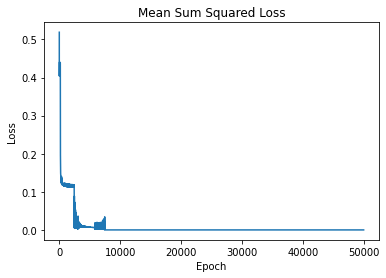

In [ ]:
# Loss

print("Loss: {:8f}".format(loss_list[epochs-1]))

plt.plot(range(len(loss_list)), loss_list)
plt.title('Mean Sum Squared Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Accuracy:  1.0


Text(0, 0.5, 'Accuracy')

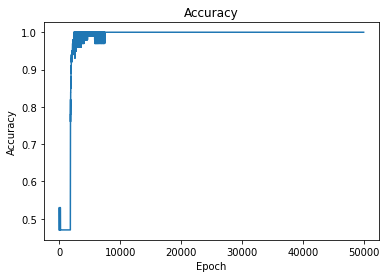

In [ ]:
# Accuracy

print("Accuracy: ", accuracy_list[epochs-1])

plt.plot(range(len(accuracy_list)), accuracy_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
def show_result(x, y, pred_y):
  plt.subplot(1,2,1)
  plt.title('Ground truth', fontsize=18)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')

  plt.subplot(1,2,2)
  plt.title('Predict result', fontsize=18)
  for i in range(x.shape[0]):
    if pred_y[i] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  plt.show()

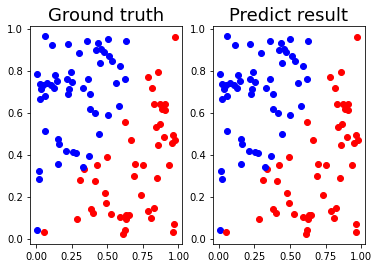

In [ ]:
show_result(x1_test, y1_test, y_pred)

## Different Learning Rates

In [ ]:
# different learning rates

epochs = 50000
learning_rate_list = [0.0001, 0.001, 0.01, 0.1, 1]

loss_list = np.zeros((epochs, len(learning_rate_list)))
accuracy_list = np.zeros((epochs, len(learning_rate_list)))
y_pred = np.zeros((epochs, len(learning_rate_list)))
for r in range(len(learning_rate_list)):
  learning_rate = learning_rate_list[r]
  NN = NeuralNetwork()

  for epoch in range(epochs):

    # Training Loss
    o = NN.forward(x1_train)
    NN.backward(x1_train, y1_train, o)
    loss_list[epoch][r] = np.square(NN.o_error).mean()
    
    # Test Accuracy
    count = 0
    o_test = NN.forward(x1_test)
    for i in range(x1_test.shape[0]):
      if o_test[i] > 0.5 : 
        y_pred[i][r] = 1
      else:
        y_pred[i][r] = 0
      if y_pred[i][r] == y1_test[i]:
        count += 1

    accuracy_list[epoch][r] = count / x1_test.shape[0]

Learning rate=0.000100 Loss:　0.246317
Learning rate=0.001000 Loss:　0.008032
Learning rate=0.010000 Loss:　0.000294
Learning rate=0.100000 Loss:　0.000003
Learning rate=1.000000 Loss:　0.440000


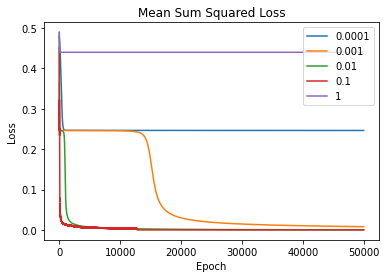

In [ ]:
# Loss

for r in range(len(learning_rate_list)):
  plt.plot(range(len(loss_list[:,r])), loss_list[:,r], label="{}".format(learning_rate_list[r]))
  print("Learning rate={:4f} Loss:　{:4f}".format(learning_rate_list[r], loss_list[epochs-1, r]))

plt.title('Mean Sum Squared Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")

Learning rate=0.000100, Accuracy:　0.470000
Learning rate=0.001000, Accuracy:　0.990000
Learning rate=0.010000, Accuracy:　1.000000
Learning rate=0.100000, Accuracy:　1.000000
Learning rate=1.000000, Accuracy:　0.470000


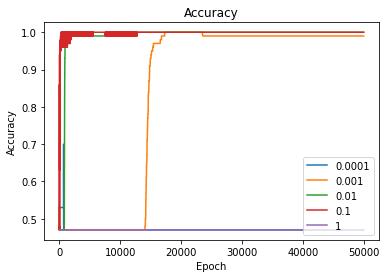

In [ ]:
# Accuracy

for r in range(len(learning_rate_list)):
  plt.plot(range(len(accuracy_list[:,r])), accuracy_list[:,r], label="{}".format(learning_rate_list[r]))
  print("Learning rate={:4f}, Accuracy:　{:4f}".format(learning_rate_list[r], accuracy_list[epochs-1, r]))

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

## Different Numbers of Hidden Units

In [ ]:
epochs = 1000
learning_rate = 0.1
Hidden1 = list(range(2, 20, 6))
Hidden2 = list(range(2, 20, 6))

loss_list = np.zeros((epochs, len(Hidden1)*len(Hidden2)))
accuracy_list = np.zeros((epochs, len(Hidden1)*len(Hidden2)))
y_pred = np.zeros((epochs, len(Hidden1)*len(Hidden2)))
time_list = np.zeros(len(Hidden1)*len(Hidden2))
r = 0

for H1 in Hidden1:
  for H2 in Hidden2:

    NN = NeuralNetwork()
    NN.hidden1Size = H1
    NN.hidden2Size = H2
    start = time.clock() 
    for epoch in range(epochs):

      # Training Loss
      o = NN.forward(x1_train)
      NN.backward(x1_train, y1_train, o)
      loss_list[epoch][r] = np.square(NN.o_error).mean()
      
      # Test Accuracy
      count = 0
      o_test = NN.forward(x1_test)
      for i in range(x1_test.shape[0]):
        if o_test[i] > 0.5 : 
          y_pred[i][r] = 1
        else:
          y_pred[i][r] = 0
        if y_pred[i][r] == y1_test[i]:
          count += 1

      accuracy_list[epoch][r] = count / x1_test.shape[0]
    
    end = time.clock() 
    time_list[r] = end-start
    
    r += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


H1=2, H2=2 Loss:　0.012435
H1=2, H2=8 Loss:　0.013944
H1=2, H2=14 Loss:　0.012138
H1=8, H2=2 Loss:　0.013698
H1=8, H2=8 Loss:　0.013879
H1=8, H2=14 Loss:　0.014094
H1=14, H2=2 Loss:　0.014835
H1=14, H2=8 Loss:　0.012197
H1=14, H2=14 Loss:　0.012782


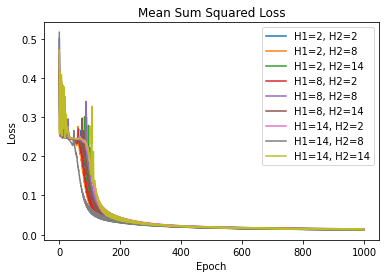

In [ ]:
# Loss

r = 0
for H1 in Hidden1:
  for H2 in Hidden2:
    plt.plot(range(len(loss_list[:,r])), loss_list[:,r], label="H1={}, H2={}".format(H1, H2))
    print("H1={}, H2={} Loss:　{:4f}".format(H1, H2, loss_list[epochs-1, r]))
    r += 1

plt.title('Mean Sum Squared Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")

H1=2, H2=2 Accuracy:　1.0
H1=2, H2=8 Accuracy:　0.96
H1=2, H2=14 Accuracy:　1.0
H1=8, H2=2 Accuracy:　0.97
H1=8, H2=8 Accuracy:　0.96
H1=8, H2=14 Accuracy:　0.97
H1=14, H2=2 Accuracy:　0.96
H1=14, H2=8 Accuracy:　1.0
H1=14, H2=14 Accuracy:　1.0


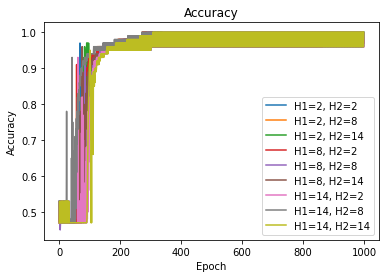

In [ ]:
# Accuracy

r = 0
for H1 in Hidden1:
  for H2 in Hidden2:
    plt.plot(range(len(accuracy_list[:,r])), accuracy_list[:,r], label="H1={}, H2={}".format(H1, H2))
    print("H1={}, H2={} Accuracy:　{}".format(H1, H2, accuracy_list[epochs-1, r]))
    r += 1

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

In [ ]:
# Time

r = 0
for H1 in Hidden1:
  for H2 in Hidden2:
    print('H1={}, H2={}, Running time: {:4f} Seconds'.format(H1, H2, time_list[r]))
    r += 1


H1=2, H2=2, Running time: 0.571002 Seconds
H1=2, H2=8, Running time: 0.601708 Seconds
H1=2, H2=14, Running time: 0.563897 Seconds
H1=8, H2=2, Running time: 0.573330 Seconds
H1=8, H2=8, Running time: 0.568916 Seconds
H1=8, H2=14, Running time: 0.555665 Seconds
H1=14, H2=2, Running time: 0.549923 Seconds
H1=14, H2=8, Running time: 0.563543 Seconds
H1=14, H2=14, Running time: 0.578566 Seconds


## Without Activation Function

In [ ]:
epochs = 50000
learning_rate = 0.1

inputSize = 2
outputSize = 1
hidden1Size = 7
hidden2Size = 5

W1 = np.random.rand(inputSize, hidden1Size)
W2 = np.random.rand(hidden1Size, hidden2Size)
W3 = np.random.rand(hidden2Size, outputSize)

loss_list = np.zeros(epochs)
accuracy_list = np.zeros(epochs)
y_pred = np.zeros(epochs)
for epoch in range(epochs):

  # Forward
  Z1 = np.matmul(x1_train, W1)
  Z2 = np.matmul(Z1, W2)
  o = np.matmul(Z2, W3)
    
  # Backward
  o_error = o - y1_train
  o_delta = 2 * o_error
  Z2_error = np.matmul(o_delta, np.matrix.transpose(W3))
  Z2_delta = Z2_error
  Z1_error = np.matmul(Z2_delta, np.matrix.transpose(W2))
  Z1_delta = Z1_error
  W3 -= learning_rate * np.matmul(np.matrix.transpose(Z2), o_delta)
  W2 -= learning_rate * np.matmul(np.matrix.transpose(Z1), Z2_delta)
  W1 -= learning_rate * np.matmul(np.matrix.transpose(x1_train), Z1_delta)

  # Loss
  loss_list[epoch] = np.square(o_error).mean()
  
  # Test Accuracy
  count = 0
  Z1 = np.matmul(x1_test, W1)
  Z2 = np.matmul(Z1, W2)
  o_test = np.matmul(Z2, W3)
  for i in range(x1_test.shape[0]):
    if o_test[i] > 0.5 : 
      y_pred[i] = 1
    else:
      y_pred[i] = 0
    if y_pred[i] == y1_test[i]:
      count += 1

  accuracy_list[epoch] = count / x1_test.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract


Loss:  nan


Text(0, 0.5, 'Loss')

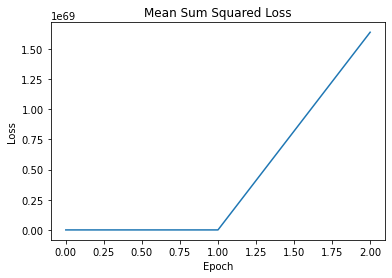

In [ ]:
# Loss

print("Loss: ",loss_list[epochs-1])

plt.plot(range(len(loss_list)), loss_list)
plt.title('Mean Sum Squared Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Accuracy:  0.47


Text(0, 0.5, 'Accuracy')

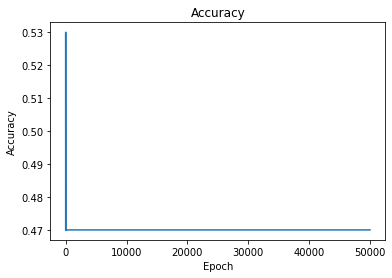

In [ ]:
# Accuracy

print("Accuracy: ", accuracy_list[epochs-1])

plt.plot(range(len(accuracy_list)), accuracy_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')